# Function Testing Notebook - Matrix Difference Plot

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import os
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mne
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, LocalCluster

In [2]:
packageroot = Path('../../').resolve()
# packageroot = Path('/home/dongjp/source-code/PyEEG').resolve()
print(packageroot)
sys.path.append(str(packageroot))

from pythoneeg import core
from pythoneeg import visualization
from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/home/dongjp/source-code/PyEEG


/home/dongjp/source-code/PyEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_str_to_genotype', 'parse_str_to_animal', 'parse_str_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer', '_log_transform']


In [3]:
# core.set_temp_directory('/scr1/users/dongjp')
core.set_temp_directory(Path('../../tmp/').resolve())
core.get_temp_directory()

PosixPath('/home/dongjp/source-code/PyEEG/tmp')

## Test WAR

In [4]:
wars = []
animal_ids = ['A10', 'F22']
base_folder = Path('./test-wars-full/').resolve()
for animal_id in animal_ids:
    # REVIEW consider making this process a single one-line function
    # war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    # war = war.filter_all()
    # wars.append(war)

    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec(multiprocess_mode='serial')

    war = ao.compute_windowed_analysis(['all'], multiprocess_mode='serial')
    # war.to_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())

    sars = ao.compute_spike_analysis(multiprocess_mode='serial')
    raws = []
    for sar in sars:
        raws.append(sar.convert_to_mne())

    war.read_sars_spikes(sars)
    wars.append(war)

    # sars = []
    # for path in Path('./test-sars/').glob(f'*{animal_id}*'):
    #     sars.append(visualization.SpikeAnalysisResult.load_fif_and_json(path))
    # war.read_sars_spikes(sars, read_mode='mne')

# ep = visualization.ExperimentPlotter(wars, exclude=['nspike'])
ep = visualization.ExperimentPlotter(wars)


Processing rows:  97%|█████████▋| 30/31 [00:01<00:00, 20.47it/s]/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1000 is greater than input length  = 360, using nperseg = 360
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/josephdong/PyEEG/pythoneeg/core/analyze_frag.py:293: UserWarning: At least one of the wavelets (91) is longer than the signal (90). Consider using a longer signal or shorter wavelets.
  con = spectral_connectivity_time(rec_mne,
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1000 is greater than input length  = 360, using nperseg = 360
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
Processing rows: 100%|██████████| 31/31 [00:01<00:00, 20.33it/s]


Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


write_binary_recording (no parallelization): 100%|██████████| 3/3 [00:00<00:00, 63.71it/s]
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Creating RawArray with float64 data, n_channels=10, n_times=120360
    Range : 0 ... 120359 =      0.000 ...   120.359 secs
Ready.


Processing rows:  99%|█████████▉| 116/117 [00:05<00:00, 20.94it/s]/Users/josephdong/PyEEG/pythoneeg/core/analyze_frag.py:293: UserWarning: At least one of the wavelets (611) is longer than the signal (610). Consider using a longer signal or shorter wavelets.
  con = spectral_connectivity_time(rec_mne,
Processing rows: 100%|██████████| 117/117 [00:05<00:00, 20.51it/s]


Channel names: 	['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012', 'Intan Input (1)/PortD D-014', 'Intan Input (1)/PortD D-015', 'Intan Input (1)/PortD D-016', 'Intan Input (1)/PortD D-017', 'Intan Input (1)/PortD D-019', 'Intan Input (1)/PortD D-021', 'Intan Input (1)/PortD D-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


write_binary_recording (no parallelization): 100%|██████████| 8/8 [00:00<00:00, 49.09it/s]
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Creating RawArray with float64 data, n_channels=10, n_times=466440
    Range : 0 ... 466439 =      0.000 ...   466.439 secs
Ready.


In [5]:
for feat in constants.LINEAR_FEATURES:
    # if feat == 'nspike':
    #     logging.info("skipping nspike")
    #     continue
    logging.info(f'pulling {feat}')
    ep.pull_timeseries_dataframe(feat, ['genotype','animalday'])

df2 = ep.pull_timeseries_dataframe('rms', ['genotype','animal'], collapse_channels=True)

In [6]:
# g = ep.plot_catplot('psdband', ['animal'], 
#                     collapse_channels=False, hue='channel', col='band',
#                     # stat_pairs='x',
#                     # stat_pairs=[[('A10 KO Dec-13-2023', 'theta'), ('F22 KO Dec-12-2023', 'delta')]],
#                     # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
#                     # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
#                     # stat_pairs=perms,
#                     # stat_test='Brunner-Munzel',
#                     # norm_test='log-D-Agostino',
#                     )

,genotype,channel,cohere,band
0,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",delta
1,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",theta
2,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",alpha
3,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",beta
4,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",gamma
...,...,...,...,...
735,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",delta
736,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",theta
737,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",alpha
738,KO,all,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",beta


,animalday,genotype,channel,band,cohere
0,A10 KO Dec-13-2023,KO,all,alpha,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,A10 KO Dec-13-2023,KO,all,beta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,A10 KO Dec-13-2023,KO,all,delta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,A10 KO Dec-13-2023,KO,all,gamma,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,A10 KO Dec-13-2023,KO,all,theta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,F22 KO Dec-12-2023,KO,all,alpha,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,F22 KO Dec-12-2023,KO,all,beta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,F22 KO Dec-12-2023,KO,all,delta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,F22 KO Dec-12-2023,KO,all,gamma,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,F22 KO Dec-12-2023,KO,all,theta,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


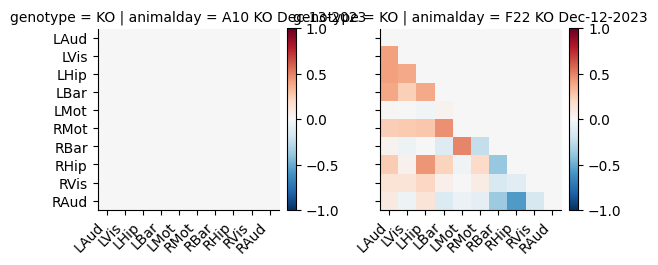

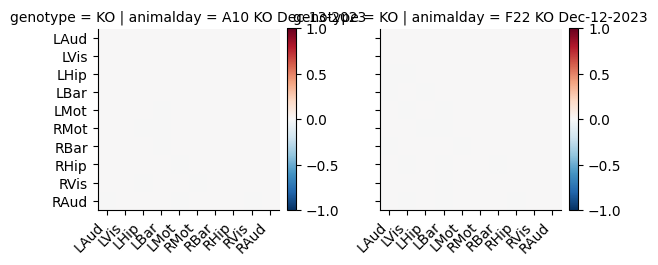

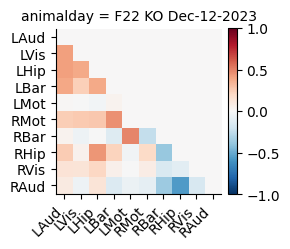

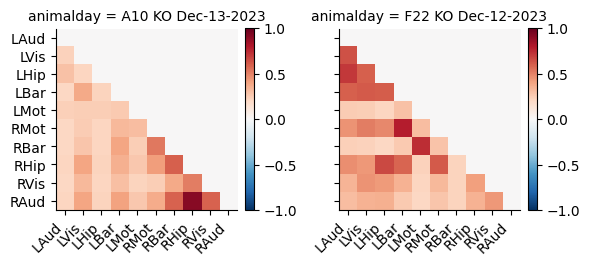

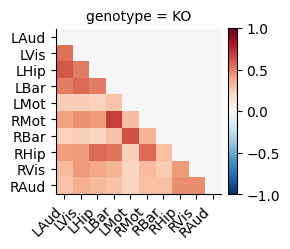

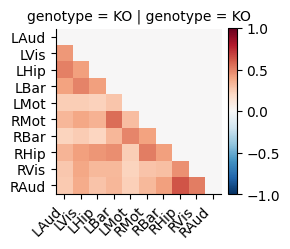

In [7]:
# logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
# logger = logging.getLogger()
ep.plot_diffheatmap('cohere', ['animalday', 'genotype'], baseline_key=('A10 KO Dec-13-2023', 'KO'), average_groupby=True)
ep.plot_diffheatmap('cohere', ['animalday', 'genotype', 'isday'], baseline_key=(True, 'KO'), baseline_groupby=['isday', 'genotype'])
ep.plot_diffheatmap('cohere', 'animalday', baseline_key='A10 KO Dec-13-2023', remove_baseline=True)
ep.plot_heatmap('cohere', 'animalday')
g = ep.plot_heatmap('cohere', 'genotype')
display(g.data)
g= ep.plot_heatmap('cohere', ['animalday', 'genotype'], col='genotype', row=None, average_groupby=True)
display(g.data)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F22_delta vs. F22_theta: Mann-Whitney-Wilcoxon test two-sided, P_val:7.862e-13 U_stat=1.055e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F22_delta vs. F22_theta: Mann-Whitney-Wilcoxon test two-sided, P_val:7.862e-13 U_stat=1.055e+04


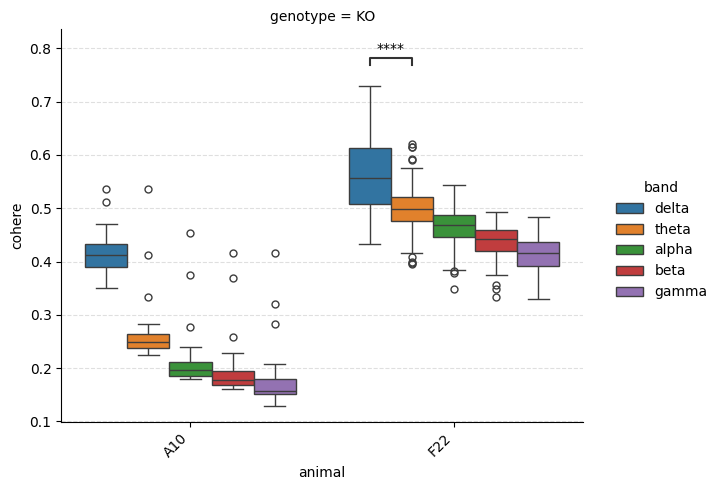

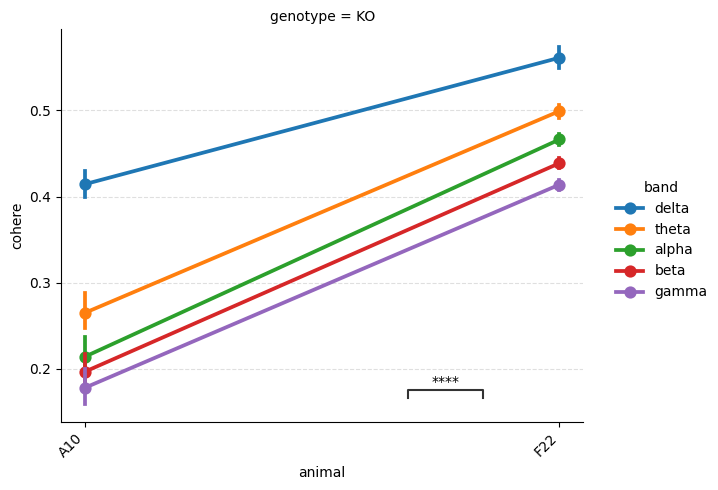

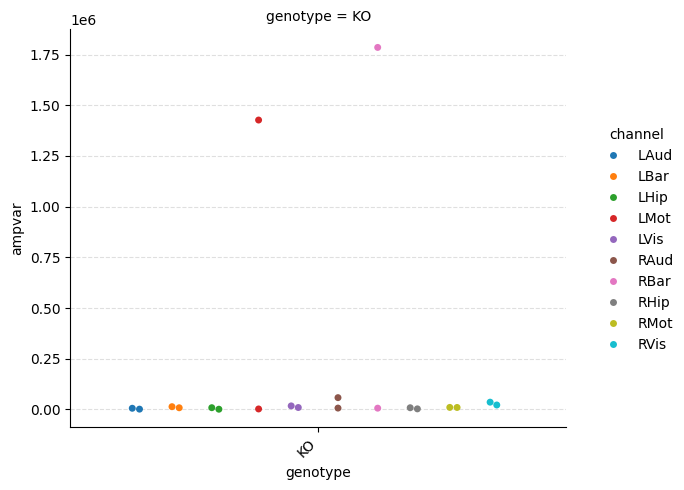

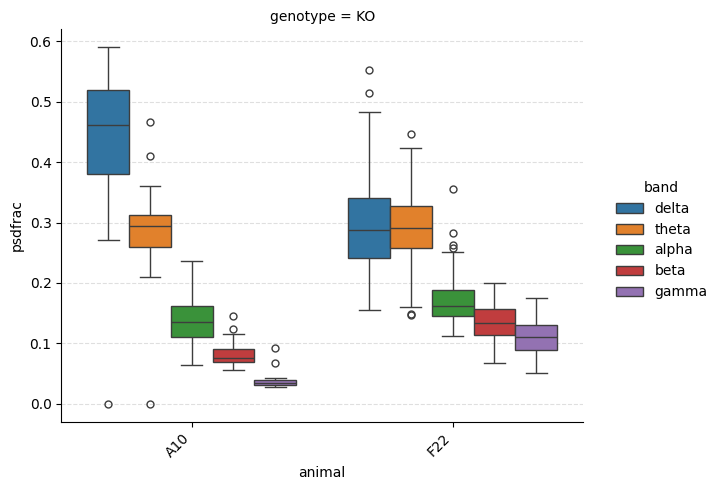

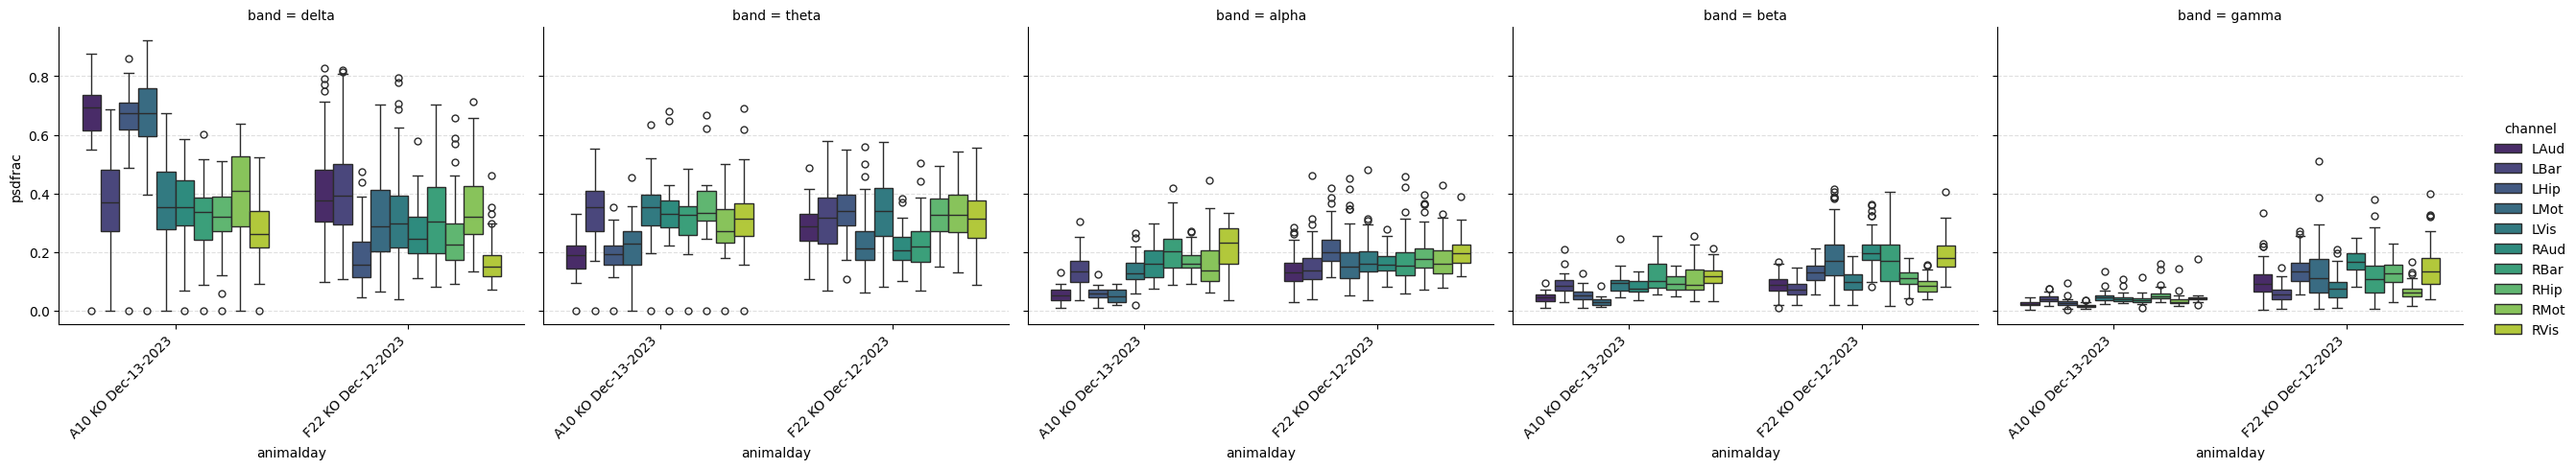

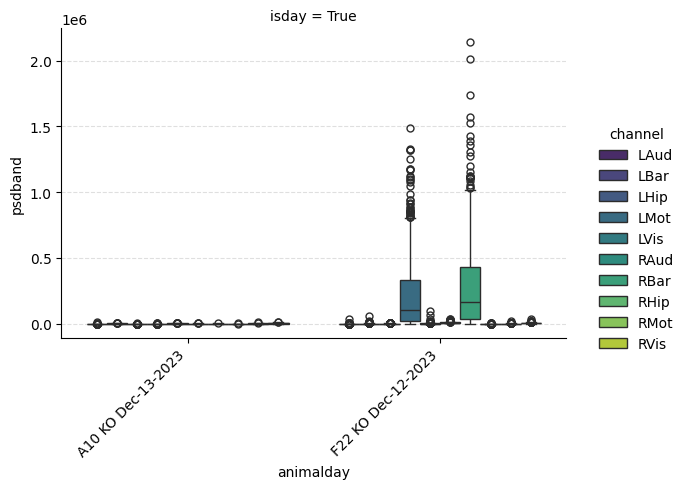

In [8]:
ep.plot_catplot('cohere', ['animal', 'genotype'], collapse_channels=True, hue='band', stat_pairs=[[('F22', 'delta'), ('F22', 'theta')]])
ep.plot_catplot('cohere', ['animal', 'genotype'], collapse_channels=True, hue='band', kind='point', stat_pairs=[[('F22', 'delta'), ('F22', 'theta')]], catplot_params={'errorbar': 'ci'})
ep.plot_catplot('ampvar', ['animal', 'genotype'], x='genotype', kind='swarm', average_groupby=True, catplot_params={'dodge': True})
ep.plot_catplot('psdfrac', ['animal', 'genotype'], collapse_channels=True, hue='band')
ep.plot_catplot('psdfrac', ['isday', 'animalday'], hue='channel', x='animalday', col='band', cmap='viridis')
ep.plot_catplot('psdband', ['isday', 'animalday'], hue='channel', x='animalday', col='isday', cmap='viridis')

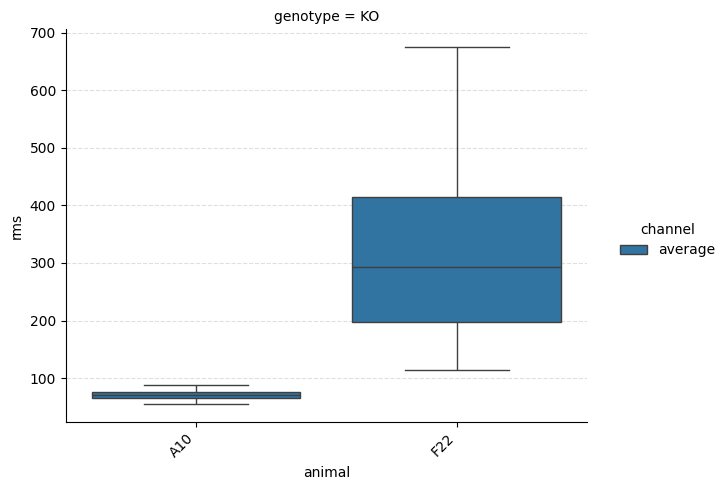

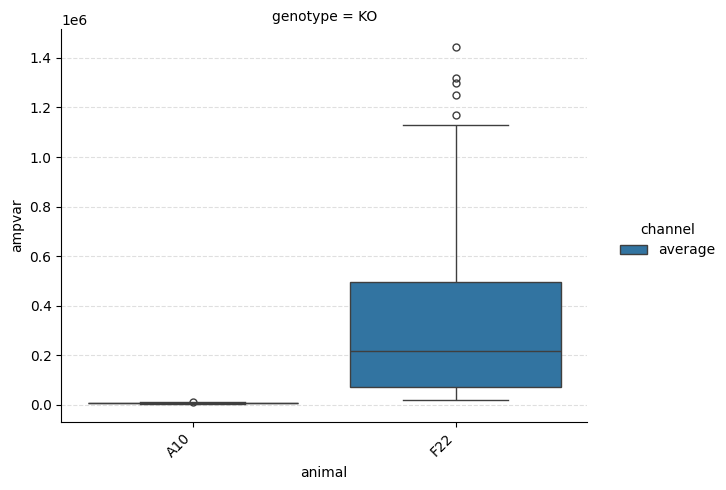

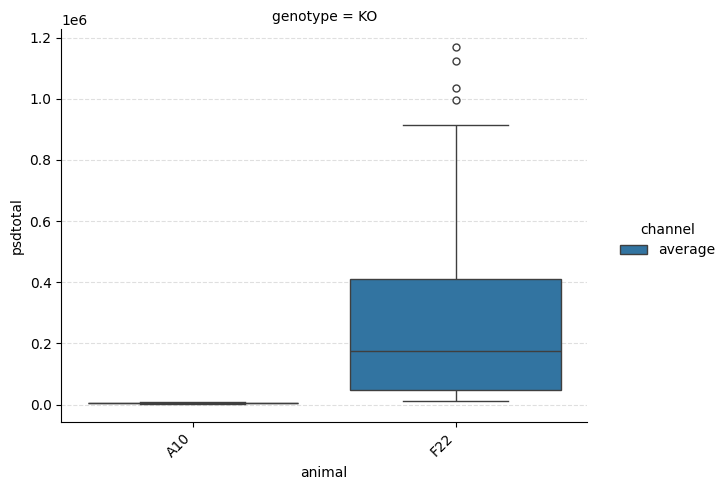

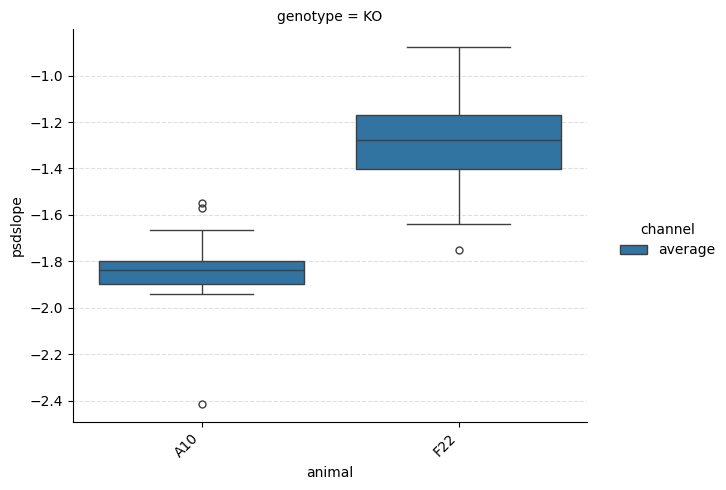

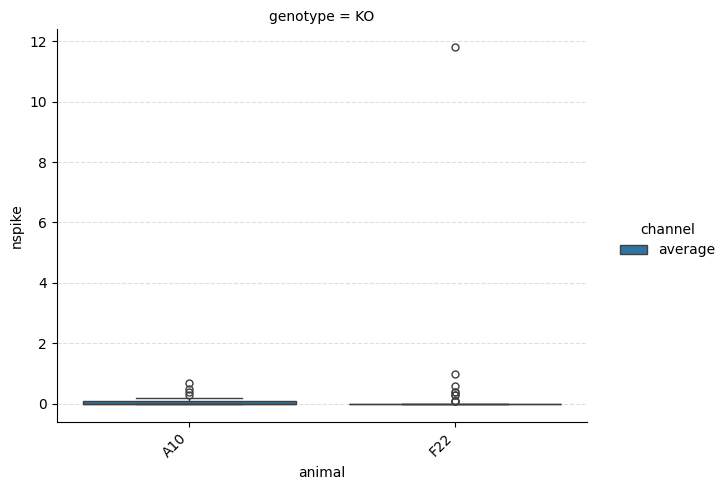

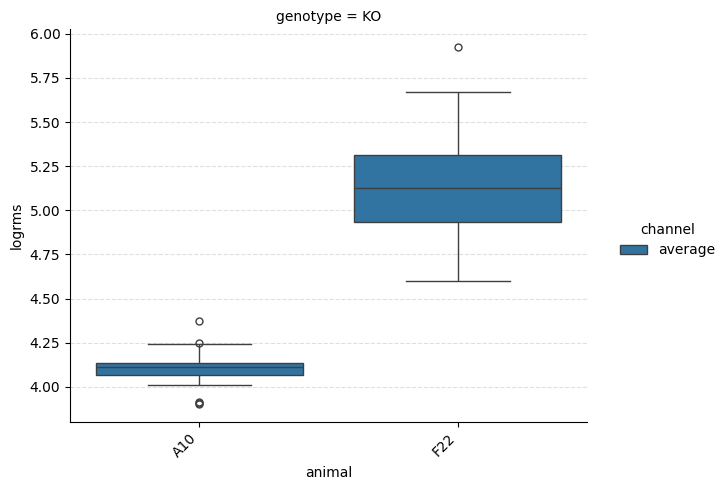

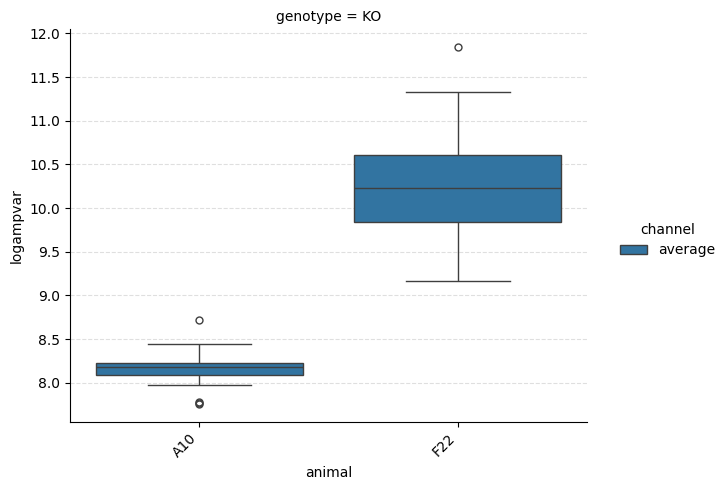

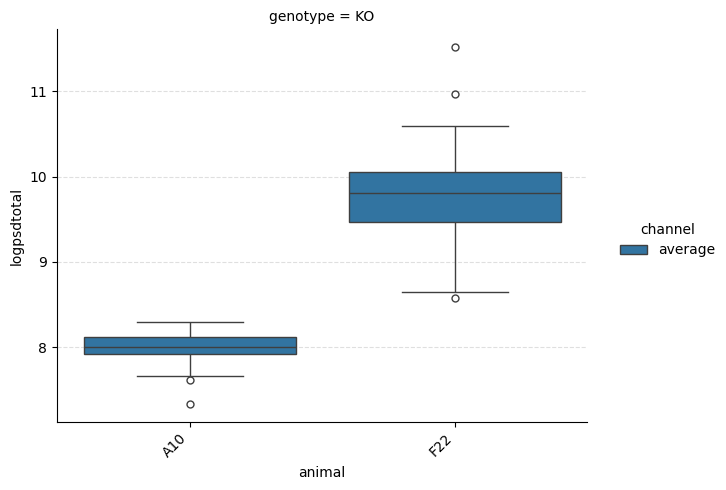

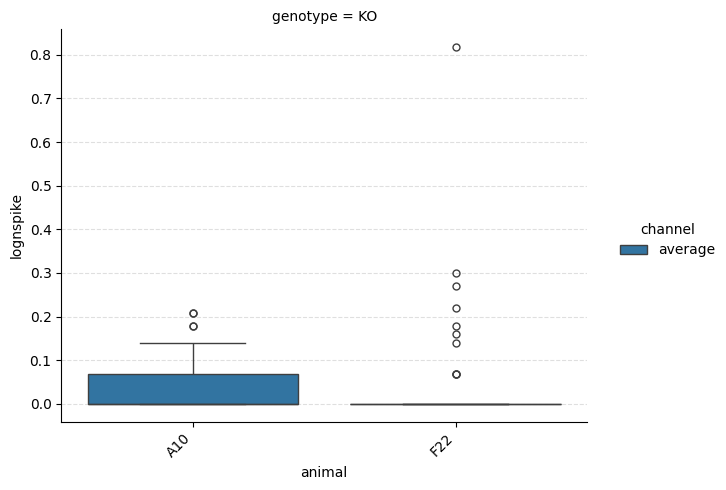

In [9]:
for feature in constants.LINEAR_FEATURES:
    ep.plot_catplot(feature, ['animal', 'genotype'], collapse_channels=True)